### Explaining a linear regression model using teh California Housing Dataset

THis dataset consists of 20,640 blocks of houses across California in 1990, where our goal is to predict the natural log of the median home price from 8 different features.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from shap.datasets import california
from shap import utils
import shap

In [2]:
X, y = california(n_points=1000)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43


In [3]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,1000.0,3.797333,1.877360,0.805400,2.509625,3.384100,4.604925,15.000100
HouseAge,1000.0,28.109000,12.576139,2.000000,18.000000,28.000000,37.000000,52.000000
AveRooms,1000.0,5.445472,2.851739,1.598131,4.363796,5.148000,6.025256,50.837838
AveBedrms,1000.0,1.120013,0.582361,0.571429,1.008379,1.049282,1.098282,10.270270
Population,1000.0,1407.955000,995.183757,32.000000,794.000000,1188.000000,1722.000000,9360.000000
AveOccup,1000.0,2.932862,0.882048,1.161290,2.425389,2.810982,3.283559,16.048780
Latitude,1000.0,35.660080,2.142337,32.570000,33.937500,34.285000,37.692500,41.780000
Longitude,1000.0,-119.582050,2.014985,-124.250000,-121.760000,-118.560000,-117.990000,-114.660000


In [4]:
X100 = utils.sample(X, 100) # Sample 100 instances
X100.shape, y.shape

((100, 8), (1000,))

In [5]:
X100.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,100.0,3.734804,2.037017,1.125000,2.475400,3.299450,4.364525,15.000100
HouseAge,100.0,27.490000,12.301347,4.000000,17.750000,29.000000,36.000000,52.000000
AveRooms,100.0,5.566971,3.207058,3.104405,4.534938,5.109780,5.842732,34.571429
AveBedrms,100.0,1.131033,0.616689,0.858852,1.008909,1.036365,1.110380,7.022321
Population,100.0,1472.140000,995.836900,151.000000,836.250000,1176.500000,1876.250000,5587.000000
AveOccup,100.0,2.933459,0.705366,1.500000,2.424530,2.840141,3.295943,5.153285
Latitude,100.0,35.716000,2.176571,32.580000,34.035000,34.290000,37.820000,40.880000
Longitude,100.0,-119.415100,2.080025,-124.060000,-121.440000,-118.460000,-117.910000,-114.660000


In [6]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

#### Examining the model coefficients

In [7]:
print("Model Coefficients: \n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model Coefficients: 

MedInc = 0.42563
HouseAge = 0.01033
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272


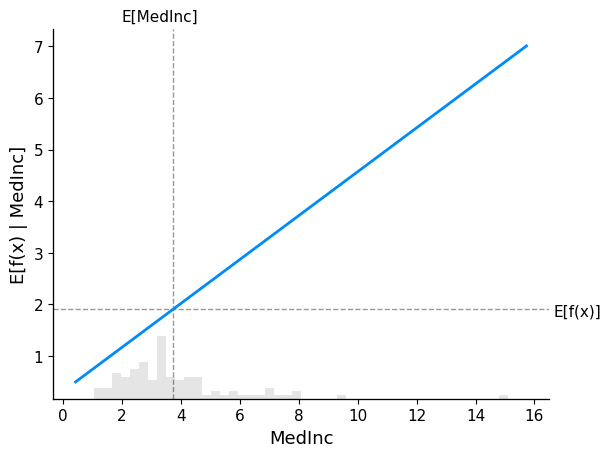

In [8]:
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

### Computer the SHAP values for the linear model

In [9]:
explainer = shap.Explainer(model.predict, X100)
explainer

In [10]:
shap_values = explainer(X)

ExactExplainer explainer: 1001it [00:19, 35.10it/s]                          


In [11]:
shap_values

.values =
array([[ 0.17748606, -0.05673697, -0.01115696, ..., -0.32545122,
         1.46557209, -1.09436981],
       [ 0.87032679,  0.04660906, -0.06272121, ..., -0.02283925,
         0.83933912, -0.66867102],
       [ 0.26129264,  0.01560525, -0.04222865, ...,  0.00609243,
        -1.3711698 ,  1.12204024],
       ...,
       [ 1.33894557, -0.11874459, -0.31423139, ..., -0.06020864,
        -0.94589219,  1.16368468],
       [ 0.06758836, -0.1497484 ,  0.16704909, ...,  0.30915583,
        -0.72156993,  1.14054888],
       [ 0.7591522 , -0.02573316, -0.05379078, ..., -0.17721623,
         0.59632334,  0.21974387]])

.base_values =
array([1.90353381, 1.90353381, 1.90353381, 1.90353381, 1.90353381,
       1.90353381, 1.90353381, 1.90353381, 1.90353381, 1.90353381,
       1.90353381, 1.90353381, 1.90353381, 1.90353381, 1.90353381,
       1.90353381, 1.90353381, 1.90353381, 1.90353381, 1.90353381,
       1.90353381, 1.90353381, 1.90353381, 1.90353381, 1.90353381,
       1.90353381, 1.90353

In [12]:
shap_values[11]

.values =
array([-0.48249602, -0.06707158, -0.05489973, -0.02204459, -0.01952732,
       -0.04856623, -0.59071528,  0.36781302])

.base_values =
1.9035338119654182

.data =
array([   2.6012    ,   21.        ,    6.03985507,    1.09782609,
        861.        ,    3.11956522,   36.98      , -120.21      ])

### Make a standard dependence plot

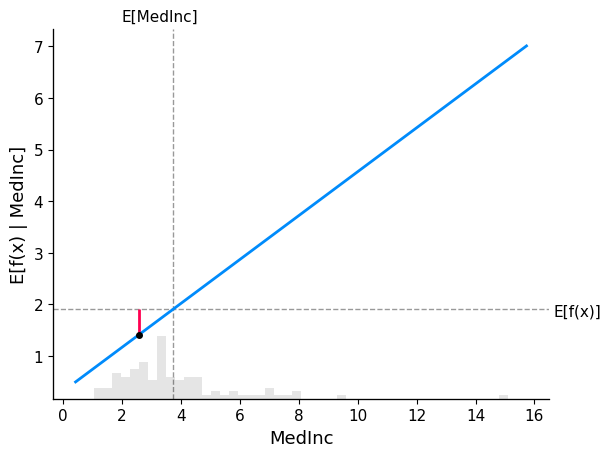

In [13]:
sample_ind = 20
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind: sample_ind + 1, :],
)

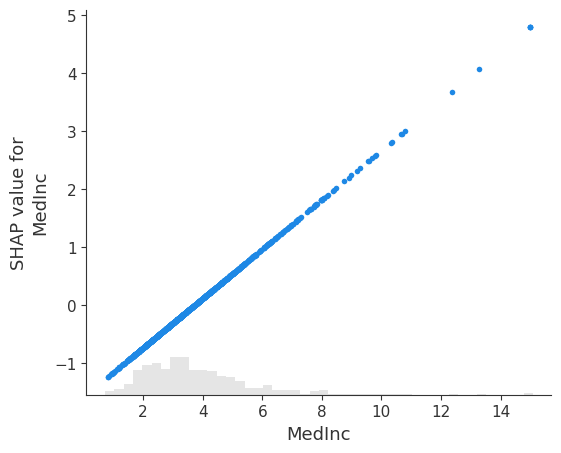

In [14]:
shap.plots.scatter(shap_values[:, "MedInc"])

### The additive nature of Shapley values using `WaterFall Plots`

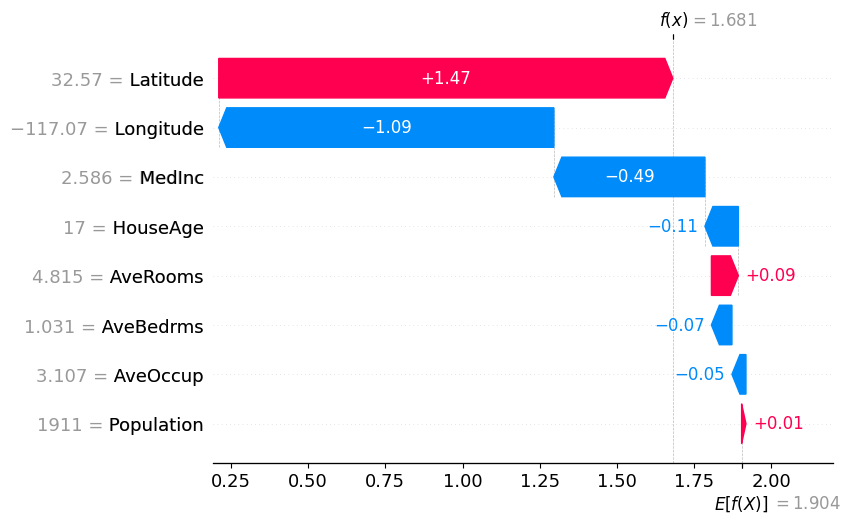

<Figure size 640x480 with 0 Axes>

In [17]:
### The waterfall_plot shows hot to get from shap_values.base_values to model.predict(X)[sample_id]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)
plt.savefig("WaterFall.png", dpi=300)
plt.show()

## The Beeswarm Plot

**The beeswarm plot displays SHAP values for each feature across all examples, with colors indicating how the SHAP values correlate with feature values**

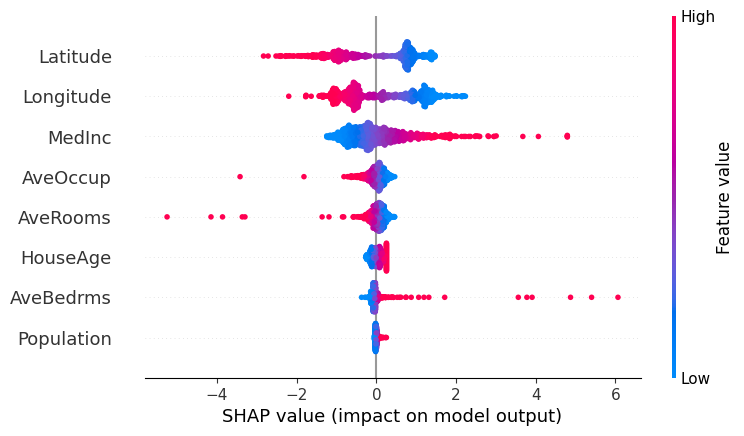

In [21]:
shap.plots.beeswarm(shap_values)

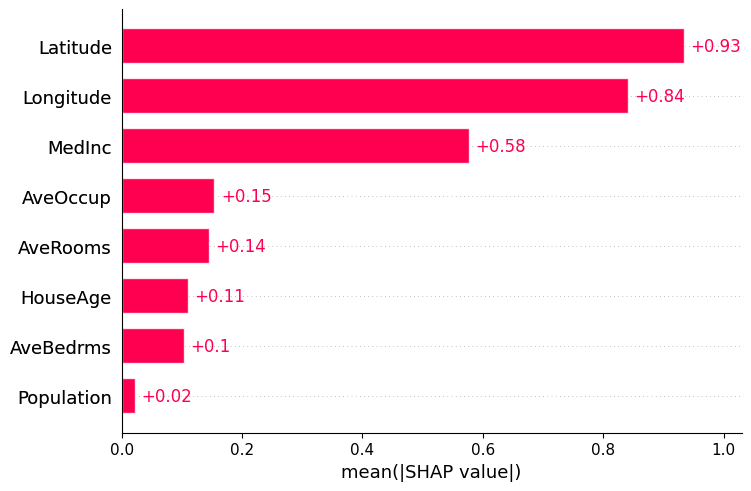

In [22]:
shap.plots.bar(shap_values)

### SHAP heatmaps

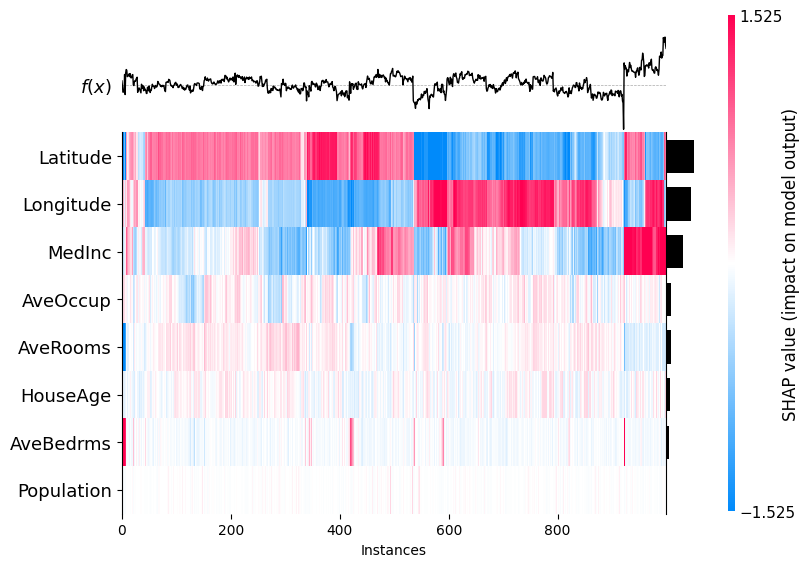

<Axes: xlabel='Instances'>

In [23]:
shap.plots.heatmap(shap_values[:1000])

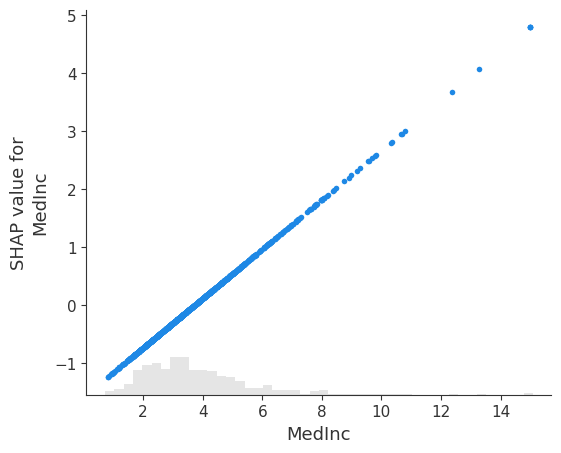

In [26]:
shap.plots.scatter(shap_values[:, "MedInc"])